# Visualization of adding noise 

In [1]:
import pickle
import sys
import os
import Orange 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)

In [15]:
def get_diff(result_dict): 
    diff_dict = {}
    diff_dict['KNN'] = (result_dict['KNN double'] / result_dict['KNN']) - 1
    #diff_dict['SVM'] = (result_dict['SVM double'] / result_dict['SVM']) - 1
    #diff_dict['LR'] = (result_dict['LR double'] / result_dict['LR'] ) - 1
    #diff_dict['RF'] = (result_dict['RF double'] / result_dict['RF'] ) - 1
    return diff_dict
def get_noise_diff_dict(noise_dict):
    noise_diff_dict = {}
    for noise_level , cd_dict in noise_dict.items():
        temp_diff_dict = {}
        for dataset, result_dict in cd_dict.items():
            temp_diff_dict[dataset] = get_diff(result_dict)
        noise_diff_dict[noise_level] = temp_diff_dict
    return noise_diff_dict

def get_noise_levels(noise_dict):
    return list(noise_dict.keys())

def get_classifier_names_and_datasets(noise_diff_dataset_dev):
    datasets = list(noise_diff_dataset_dev.keys())
    return datasets , list(noise_diff_dataset_dev[datasets[0]].keys())

## Noise amplitude varying plot

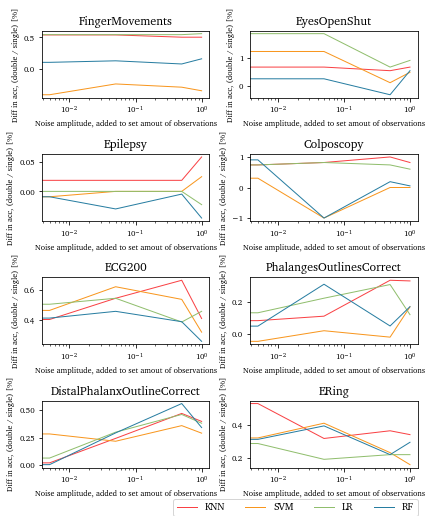

In [11]:
a_file = open(module_path + '/src/dictionaries/datasets_results_noise_lr_helper.pkl', 'rb')
noise_dict = pickle.load(a_file)

def get_noise_diff_dataset_dev(noise_dict):
    noise_diff_dict = get_noise_diff_dict(noise_dict)
    noise_diff_dataset_dev = {}
    for noise_level , cd_dict in noise_diff_dict.items():
        for dataset, result_dict in cd_dict.items():
            temp_dict_dataset = {}
            for clf, result in result_dict.items():
                if noise_level == 0.0:
                    temp_dict_dataset[clf] = [result]
                else:
                    noise_diff_dataset_dev[dataset][clf].append(result)
            if noise_level == 0.0:
                noise_diff_dataset_dev[dataset] = temp_dict_dataset
    return noise_diff_dataset_dev

noise_diff_dataset_dev = get_noise_diff_dataset_dev(noise_dict)
x = get_noise_levels(noise_dict)
datasets, clfs = get_classifier_names_and_datasets(noise_diff_dataset_dev)

f, ax_arr = plt.subplots(4,len(datasets)//4) # 1 x 1 array , can also be any other size
f.set_size_inches(6, 7)
colors = ["#F94144", '#F8961E','#90BE6D','#277DA1']
idx = 0
for ax_col in ax_arr:
    for ax in ax_col:
        for [i, clf] in enumerate(clfs):
            ax.semilogx(x, noise_diff_dataset_dev[datasets[idx]][clf], colors[i], label = clf, linewidth = 1)  
        for label in ax.get_yticklabels() :
            label.set_fontproperties(font_small)
        for label in ax.get_xticklabels() :
            label.set_fontproperties(font_small)
        ax.set_ylabel(f'Diff in acc, (double / single) [%]', fontproperties = font_small)
        ax.set_xlabel('Noise amplitude, added to set amout of observations', fontproperties = font_small)
        for child in ax.get_children():
            if isinstance(child, matplotlib.text.Text):
                child.set_fontproperties(font_small)
        ax.set_title(datasets[idx])
        idx = idx + 1

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc = (0.4, 0), ncol=4 , prop = font)
f.tight_layout()
figure_path = module_path + '/figures/'
f.savefig(figure_path + 'IncreasingAmplitudeNoiseEffect.pdf' , bbox_inches='tight')   
plt.show()

In [36]:
noise_diff_dataset_dev

{'FingerMovements': {'KNN': [0.5384615384615385,
   0.5384615384615385,
   0.13043478260869557,
   -0.007518796992481258,
   0.4046822742474916]},
 'EyesOpenShut': {'KNN': [-0.04761904761904767,
   0.6666666666666667,
   0.6666666666666667,
   0.5384615384615383,
   -1.0]},
 'Epilepsy': {'KNN': [0.0185185185185186,
   0.0185185185185186,
   0.0185185185185186,
   0.0185185185185186,
   0.0]},
 'Colposcopy': {'KNN': [0.33333333333333326,
   0.8181818181818181,
   0.0,
   0.6000000000000001,
   0.3333333333333335]},
 'ECG200': {'KNN': [0.42222222222222205,
   0.5686274509803921,
   0.5,
   0.5476190476190477,
   0.0]},
 'PhalangesOutlinesCorrect': {'KNN': [0.05329623287671237,
   0.09218887476781701,
   0.11715296198054803,
   0.296034946236559,
   0.09046369203849514]},
 'DistalPhalanxOutlineCorrect': {'KNN': [0.40053050397877965,
   0.4115660616293795,
   0.6403508771929827,
   0.18804243008678867,
   0.24137931034482762]},
 'ERing': {'KNN': [0.3863928112965338,
   0.3076923076923077,


In [33]:
res = []
for elm, key in noise_diff_dataset_dev.items():
    res.append(list(key.values())[0])

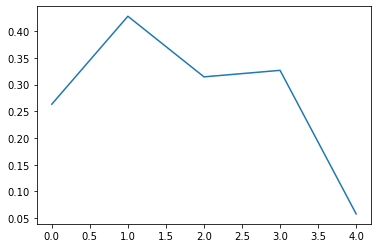

In [38]:
plt.plot(pd.DataFrame(res).mean())

The plot above shows how adding noise of certain amplitudes effects the difference in accuracy between the single and double classifiers. From looking at the figure above, it seems like there is a tendency in most of the datasets, for most of the classifiers, that the difference in accuracy increases, as the noise get more vigorous. 

## Noise amount varying plot

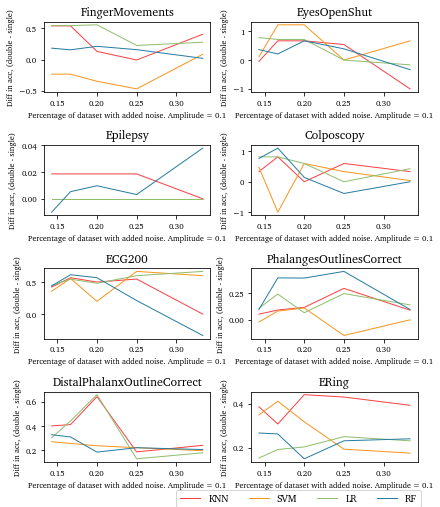

In [12]:
a_file = open(module_path + '/src/dictionaries/datasets_results_noise_amount_lr_helper.pkl', 'rb')
noise_dict = pickle.load(a_file)

def get_noise_diff_dataset_dev(noise_dict):
    noise_diff_dict = get_noise_diff_dict(noise_dict)
    noise_diff_dataset_dev = {}
    for noise_level , cd_dict in noise_diff_dict.items():
        for dataset, result_dict in cd_dict.items():
            temp_dict_dataset = {}
            for clf, result in result_dict.items():
                if noise_level == 7:
                    temp_dict_dataset[clf] = [result]
                else:
                    noise_diff_dataset_dev[dataset][clf].append(result)
            if noise_level == 7:
                noise_diff_dataset_dev[dataset] = temp_dict_dataset
    return noise_diff_dataset_dev

noise_diff_dataset_dev = get_noise_diff_dataset_dev(noise_dict)

x = get_noise_levels(noise_dict)
x = 1/np.array(x)
datasets, clfs = get_classifier_names_and_datasets(noise_diff_dataset_dev)


f, ax_arr = plt.subplots(4,len(datasets)//4) # 1 x 1 array , can also be any other size
f.set_size_inches(6, 7)
colors = ["#F94144", '#F8961E','#90BE6D','#277DA1']
idx = 0
for ax_col in ax_arr:
    for ax in ax_col:
        for [i, clf] in enumerate(clfs):
            ax.plot(x, noise_diff_dataset_dev[datasets[idx]][clf], colors[i], label = clf, linewidth = 1)  
        for label in ax.get_yticklabels() :
            label.set_fontproperties(font_small)
        for label in ax.get_xticklabels() :
            label.set_fontproperties(font_small)
        ax.set_ylabel(f'Diff in acc, (double - single)', fontproperties = font_small)
        ax.set_xlabel('Percentage of dataset with added noise. Amplitude = 0.1', fontproperties = font_small)
        for child in ax.get_children():
            if isinstance(child, matplotlib.text.Text):
                child.set_fontproperties(font_small)
        ax.set_title(datasets[idx])
        idx = idx + 1

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc = (0.4, 0), ncol=4 , prop = font)
f.tight_layout()
figure_path = module_path + '/figures/'
f.savefig(figure_path + 'IncreasingAmountNoiseEffect.pdf' , bbox_inches='tight')  
plt.show()